Лабораторная работа №4

Тема: Интерполяция и экстраполяция функций.

Цель работы: изучить методы интерполяции и экстраполяции функций, особенности их алгоритмизации.

Вариант 3


Дата ........... | Курс (грузинский лари) \\
30/03/2023 | 29.9386 \\
29/04/2023 | 32.2153 \\
30/05/2023 | 30.9381 \\
30/06/2023 | 33.1938 \\
29/07/2023 | 34.3431 \\
30/08/2023 | 36.3919 \\
30/09/2023 | 36.3054 \\
31/10/2023 | 34.4874 \\
30/11/2023 | 32.7647 \\
30/12/2023 | 33.3042 \\
30/01/2024 | 33.4987 \\
29/02/2024 | 34.5867 \\
30/03/2024 | 34.2375 \\


**Задание 1** \\
В учебно-методических целях выполнить построение интерполяционного полинома Ньютона и расчет интерполяционного значения для демонстрационного задания на языке Python:

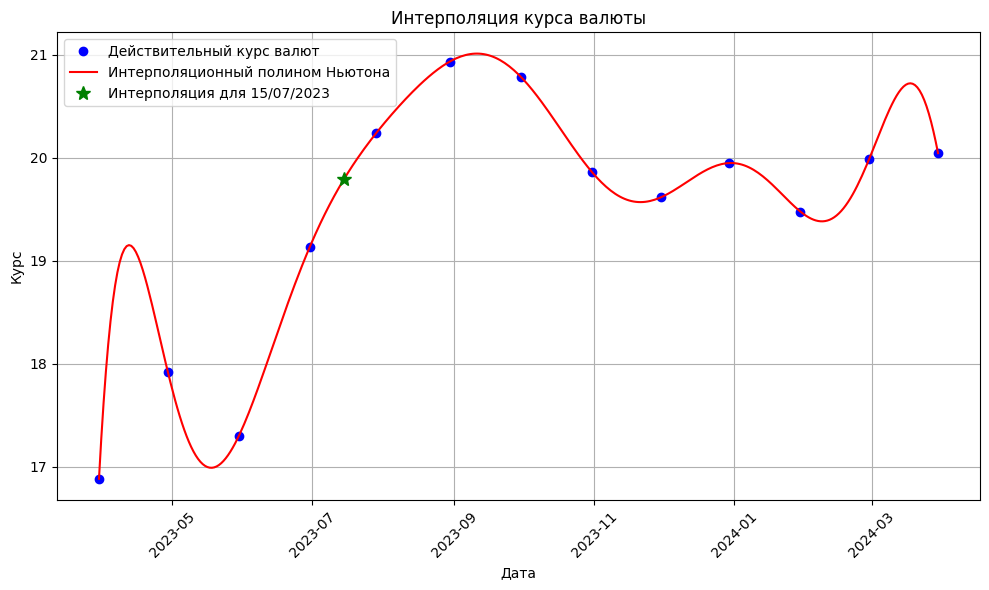

(None, 19.79770110996055)

In [2]:
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt

def calculate_days_since_start(dates_str):
    """
    Преобразует строки с датами в объекты datetime и вычисляет количество дней с начальной даты.

    Параметры:
    - dates_str (list of str): Список строк, представляющих даты в формате "дд/мм/гггг".

    Возвращает:
    - list of datetime: Список объектов datetime, соответствующих входным строкам.
    - list of int: Список, содержащий количество дней с начальной даты для каждой даты.
    """
    dates = [datetime.strptime(date, "%d/%m/%Y") for date in dates_str]
    start_date = dates[0]
    days_since_start = [(date - start_date).days for date in dates]
    return dates, days_since_start

def calculate_divided_differences(days, rates):
    """
    Вычисляет коэффициенты для формулы интерполяции Ньютона с разделенными разностями.

    Параметры:
    - days (list of int): Список, содержащий количество дней с начальной даты.
    - rates (list of float): Курсы валют для соответствующих дат.

    Возвращает:
    - ndarray: Массив коэффициентов для интерполяции.
    """

    num_points = len(rates)
    coefficients = np.zeros([num_points, num_points])
    coefficients[:,0] = rates

    for j in range(1, num_points):
        for i in range(num_points - j):
            coefficients[i][j] = (coefficients[i+1][j-1] - coefficients[i][j-1]) / (days[i+j] - days[i])

    return coefficients[0, :]


def newton_interpolation(x, days, coefficients):
    """
    Выполняет интерполяцию по Ньютону для заданного дня.

    Параметры:
    - x (int): Количество дней от начальной даты, для которого требуется вычислить курс.
    - days (list of int): Список, содержащий количество дней с начальной даты для каждой даты.
    - coefficients (ndarray): Массив коэффициентов для интерполяции.

    Возвращает:
    - float: Интерполированное значение курса валюты для заданного дня.
    """
    degree = len(coefficients) - 1
    result = coefficients[degree]

    for i in range(degree - 1, -1, -1):
        result = result * (x - days[i]) + coefficients[i]
    return result

# Исходные данные (курс румынского лея)
dates_str = ["30/03/2023", "29/04/2023", "30/05/2023", "30/06/2023", "29/07/2023",
             "30/08/2023", "30/09/2023", "31/10/2023", "30/11/2023", "30/12/2023",
             "30/01/2024", "29/02/2024", "30/03/2024"]
rates = [16.8834, 17.9248, 17.2996, 19.1376, 20.2426, 20.9347, 20.7867, 19.8631,
         19.6156, 19.9494, 19.4773, 19.9911, 20.0456]

# Обработка данных
dates, days_since_start = calculate_days_since_start(dates_str)
coefficients = calculate_divided_differences(days_since_start, rates)

# Выбор тестовой даты и интерполяция
test_date_str = "15/07/2023"
test_days_since_start = (datetime.strptime(test_date_str, "%d/%m/%Y") - dates[0]).days
interpolated_rate = newton_interpolation(test_days_since_start, days_since_start, coefficients)

# Подготовка данных для графика
interpolation_days = np.linspace(min(days_since_start), max(days_since_start), 365)
interpolated_rates = [newton_interpolation(day, days_since_start, coefficients) for day in interpolation_days]
interpolated_dates = [dates[0] + timedelta(days=day) for day in interpolation_days]

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(dates, rates, 'bo', label='Действительный курс валют')
plt.plot(interpolated_dates, interpolated_rates, 'r-', label='Интерполяционный полином Ньютона')
plt.plot(datetime.strptime(test_date_str, "%d/%m/%Y"), interpolated_rate, 'g*', markersize=10, label=f'Интерполяция для {test_date_str}')
plt.xlabel('Дата')
plt.ylabel('Курс')
plt.title('Интерполяция курса валюты')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show(), interpolated_rate

Исследовать ошибку интерполяции на краях интервала. Как называется наблюдаемый на графике эффект?

Феномен Рунге

**Задание 2** \\
Взять данные индивидуального задания и построить интерполяционный полином Ньютона (изменив код программы на языке Python). Добавить в код программы оценку погрешности. Выполнить расчет интерполяционного значения для даты своего рождения (в интервале известных значений). Оценить ошибку интерполяции. Используйте узлы Чебышёва или другие оптимизированные распределения узлов, чтобы минимизировать ошибку интерполяции (подготовить новую версию программы на языке Python). При необходимости добавить узлы, используя открытую базу данных ЦБ РФ: https://www.cbr.ru/currency_base/dynamics/. Все необходимые числовые результаты и графики отразить в отчете.

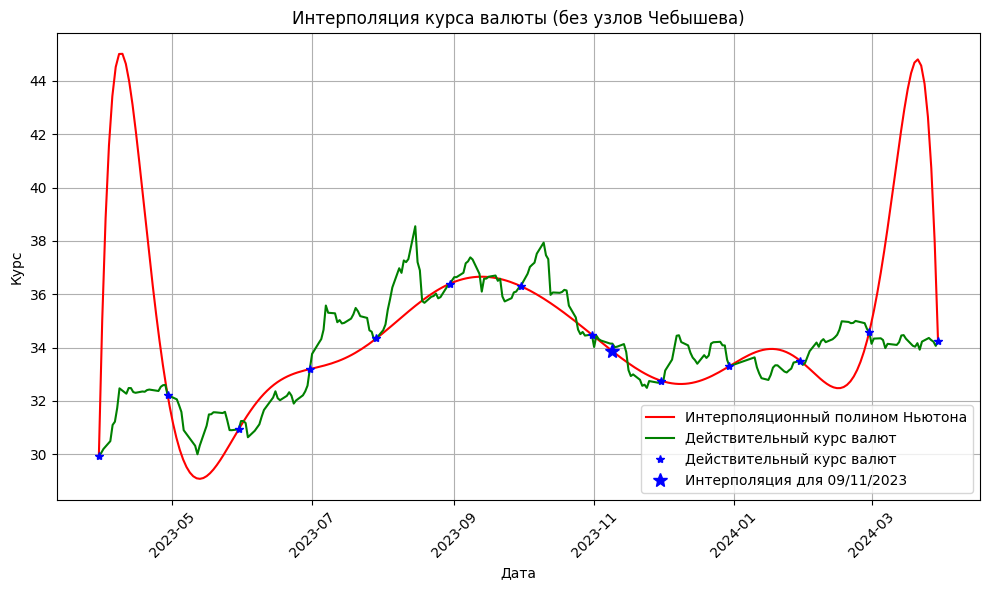

Погрешность:  2.6684047596679297


In [5]:
from scipy.interpolate import interp1d

all_dates_str = [
 "30/03/2024", "29/03/2024", "28/03/2024", "27/03/2024", "26/03/2024", "23/03/2024",
 "22/03/2024", "21/03/2024", "20/03/2024", "19/03/2024", "16/03/2024", "15/03/2024",
 "14/03/2024", "13/03/2024", "12/03/2024", "08/03/2024", "07/03/2024", "06/03/2024",
 "05/03/2024", "02/03/2024", "01/03/2024", "29/02/2024", "28/02/2024", "27/02/2024",
 "23/02/2024", "22/02/2024", "21/02/2024", "20/02/2024", "17/02/2024", "16/02/2024",
 "15/02/2024", "14/02/2024", "13/02/2024", "10/02/2024", "09/02/2024", "08/02/2024",
 "07/02/2024", "06/02/2024", "03/02/2024", "02/02/2024", "01/02/2024", "31/01/2024",
 "30/01/2024", "27/01/2024", "26/01/2024", "25/01/2024", "24/01/2024", "23/01/2024",
 "20/01/2024", "19/01/2024", "18/01/2024", "17/01/2024", "16/01/2024", "13/01/2024",
 "12/01/2024", "11/01/2024", "10/01/2024", "30/12/2023", "29/12/2023", "28/12/2023",
 "27/12/2023", "26/12/2023", "23/12/2023", "22/12/2023", "21/12/2023", "20/12/2023",
 "19/12/2023", "16/12/2023", "15/12/2023", "14/12/2023", "13/12/2023", "12/12/2023",
 "09/12/2023", "08/12/2023", "07/12/2023", "06/12/2023", "05/12/2023", "02/12/2023",
 "01/12/2023", "30/11/2023", "29/11/2023", "28/11/2023", "25/11/2023", "24/11/2023",
 "23/11/2023", "22/11/2023", "21/11/2023", "18/11/2023", "17/11/2023", "16/11/2023",
 "15/11/2023", "14/11/2023", "11/11/2023", "10/11/2023", "09/11/2023", "08/11/2023",
 "04/11/2023", "03/11/2023", "02/11/2023", "01/11/2023", "31/10/2023", "28/10/2023",
 "27/10/2023", "26/10/2023", "25/10/2023", "24/10/2023", "21/10/2023", "20/10/2023",
 "19/10/2023", "18/10/2023", "17/10/2023", "14/10/2023", "13/10/2023", "12/10/2023",
 "11/10/2023", "10/10/2023", "07/10/2023", "06/10/2023", "05/10/2023", "04/10/2023",
 "03/10/2023", "30/09/2023", "29/09/2023", "28/09/2023", "27/09/2023", "26/09/2023",
 "23/09/2023", "22/09/2023", "21/09/2023", "20/09/2023", "19/09/2023", "16/09/2023",
 "15/09/2023", "14/09/2023", "13/09/2023", "12/09/2023", "09/09/2023", "08/09/2023",
 "07/09/2023", "06/09/2023", "05/09/2023", "02/09/2023", "01/09/2023", "31/08/2023",
 "30/08/2023", "29/08/2023", "26/08/2023", "25/08/2023", "24/08/2023", "23/08/2023",
 "22/08/2023", "19/08/2023", "18/08/2023", "17/08/2023", "16/08/2023", "15/08/2023",
 "12/08/2023", "11/08/2023", "10/08/2023", "09/08/2023", "08/08/2023", "05/08/2023",
 "04/08/2023", "03/08/2023", "02/08/2023", "01/08/2023", "29/07/2023", "28/07/2023",
 "27/07/2023", "26/07/2023", "25/07/2023", "22/07/2023", "21/07/2023", "20/07/2023",
 "19/07/2023", "18/07/2023", "15/07/2023", "14/07/2023", "13/07/2023", "12/07/2023",
 "11/07/2023", "08/07/2023", "07/07/2023", "06/07/2023", "05/07/2023", "04/07/2023",
 "01/07/2023", "30/06/2023", "29/06/2023", "28/06/2023", "27/06/2023", "24/06/2023",
 "23/06/2023", "22/06/2023", "21/06/2023", "20/06/2023", "17/06/2023", "16/06/2023",
 "15/06/2023", "14/06/2023", "10/06/2023", "09/06/2023", "08/06/2023", "07/06/2023",
 "06/06/2023", "03/06/2023", "02/06/2023", "01/06/2023", "31/05/2023", "30/05/2023",
 "27/05/2023", "26/05/2023", "25/05/2023", "24/05/2023", "23/05/2023", "20/05/2023",
 "19/05/2023", "18/05/2023", "17/05/2023", "16/05/2023", "13/05/2023", "12/05/2023",
 "11/05/2023", "06/05/2023", "05/05/2023", "04/05/2023", "03/05/2023", "29/04/2023",
 "28/04/2023", "27/04/2023", "26/04/2023", "25/04/2023", "22/04/2023", "21/04/2023",
 "20/04/2023", "19/04/2023", "18/04/2023", "15/04/2023", "14/04/2023", "13/04/2023",
 "12/04/2023", "11/04/2023", "08/04/2023", "07/04/2023", "06/04/2023", "05/04/2023",
 "04/04/2023", "01/04/2023", "31/03/2023", "30/03/2023"
]
all_dates = [datetime.strptime(date, "%d/%m/%Y") for date in all_dates_str]

real_rates = [
34.2375, 34.0654, 34.2236, 34.2830, 34.3615, 34.2246, 33.9223, 34.1662, 34.0336,
34.0690, 34.3337,  34.4677, 34.4542, 34.2008, 34.1004, 34.1407, 33.9807, 34.2837,
34.3485, 34.3372, 34.1435, 34.5867, 34.7003, 34.9160, 34.9994, 34.9260, 34.9159,
34.9615, 34.9863, 34.6727, 34.4804, 34.3861, 34.3125, 34.2039, 34.3171, 34.2391,
34.0304, 34.1889, 33.8660, 33.6453, 33.4245, 33.3503, 33.4987, 33.4401, 33.2145,
33.1479, 33.0675, 33.1022, 33.3344, 33.3375, 33.2495, 32.9718, 32.7876, 32.8534,
33.0302, 33.2591, 33.6337, 33.3042, 33.5454, 34.0810, 34.0854, 34.2172, 34.2009,
34.1499, 33.7058, 33.6120, 33.7173, 33.3954, 33.5293, 33.6248, 33.8089, 34.0830,
34.2069, 34.4622, 34.4443, 33.9911, 33.5502, 33.1396, 32.6521, 32.7647, 32.6818,
32.6985, 32.7459, 32.4905, 32.6089, 32.5674, 32.7943, 32.9953, 32.9334, 33.1554,
33.8365, 34.1319, 34.0334, 34.0154, 34.1471, 34.1507, 34.2645, 34.3191, 34.4474,
34.0220, 34.4874, 34.4510, 34.5858, 34.5041, 34.6752, 35.1317, 35.5732, 36.1402,
36.1643, 36.0847, 36.0534, 36.0665, 35.9773, 37.3160, 37.4639, 37.9355, 37.5205,
37.1843, 37.1075, 37.0250, 36.7690, 36.3054, 36.2244, 36.0991, 36.0698, 35.8538,
35.7312, 35.9163, 36.5808, 36.5036, 36.7019, 36.6565, 36.5881, 36.5803, 36.0995,
36.7637, 37.3030, 37.3824, 37.2327, 37.1603, 36.8048, 36.6413, 36.6402, 36.5191,
36.3919, 36.3024, 35.8933, 35.8475, 36.0260, 35.9341, 35.9062, 35.6792, 35.7454,
36.8974, 37.2037, 38.5487, 37.3196, 37.2048, 37.2666, 36.8021, 36.9747, 36.2553,
35.8141, 35.4152, 34.8665, 34.6507, 34.3431, 34.2982, 34.5948, 34.6477, 35.1127,
35.1787, 35.3630, 35.4854, 35.2457, 35.0866, 34.9258, 34.9058, 35.0310, 34.9519,
35.2847, 35.3067, 35.5777, 34.6720, 34.3189, 34.1837, 33.7641, 33.1938, 32.5734,
32.3582, 32.2113, 32.0180, 31.9016, 32.1995, 32.3267, 32.1923, 32.0276, 32.1038,
32.3617, 32.1274, 31.6611, 31.4087, 31.1230, 31.0009, 30.8826, 30.6393, 31.1742,
31.2490, 31.2463, 30.9381, 30.9038, 30.9070, 31.2737, 31.5915, 31.5461, 31.5722,
31.5764, 31.5018, 31.4943, 31.0709, 30.3261, 30.0010, 30.3206, 30.9038, 31.5883,
31.8362, 32.0613, 32.2153, 32.5993, 32.5910, 32.5302, 32.3738, 32.4130, 32.4270,
32.4066, 32.3448, 32.3548, 32.3059, 32.3328, 32.4814, 32.4835, 32.2717, 32.4724,
31.7354, 31.2227, 31.0994, 30.4937, 30.1997, 30.0473, 29.9386
]

dates_str = ["30/03/2023", "29/04/2023", "30/05/2023", "30/06/2023", "29/07/2023",
             "30/08/2023", "30/09/2023", "31/10/2023", "30/11/2023", "30/12/2023",
             "30/01/2024", "29/02/2024", "30/03/2024"]
rates = [	29.9386, 32.2153, 30.9381, 	33.1938, 34.3431, 36.3919, 	36.3054, 	34.4874,
         32.7647, 33.3042, 	33.4987, 	34.5867, 34.2375 ]

def calc_error(real_dates_str,real_rates,all_dates_str, interpolated_rates):
  result = 0
  ind = 0
  for i in range(0,len(all_dates_str)):
    if ind < len(real_dates_str) and all_dates_str[i] == real_dates_str[ind]:

      result += abs(real_rates[ind] - interpolated_rates[i])
      ind+=1

  return result/len(all_dates_str)

def add_chebyshev_nodes(dates_str, rates, n, nodes=4):
  """
  Добавляет новые даты с интерполированными значениями курсов, используя Чебышёвские узлы.
  Чебышёвские узлы вычисляются так, чтобы увеличить точность интерполяции на краях диапазона.
  Параметры:
  dates_str (list): Список строк дат в формате "дд/мм/гггг".
  rates (list): Список курсов, соответствующих датам.
  n (int): Общее количество Чебышёвских узлов для генерации.
  nodes (int): Количество узлов на каждом конце интервала
  Возвращает:
  tuple: Кортеж, содержащий список дат в формате "дд/мм/гггг" и список интерполированных курсов.
  """
  # Преобразование строк дат в объекты datetime
  dates = [datetime.strptime(date, "%d/%m/%Y") for date in dates_str]
  start_date = dates[0]
  end_date = dates[-1]
  total_days = (end_date - start_date).days
  # Генерация Чебышёвских узлов
  chebyshev_points = np.cos(np.pi * (2 * np.arange(1, n + 1) - 1) / (2 * n))
  chebyshev_days = [int(0.5 * (total_days + 1) * (1 + pt)) for pt in chebyshev_points]
  # Ограничение по количеству узлов
  if len(chebyshev_days) > nodes * 2:
    chebyshev_days = chebyshev_days[:nodes] + chebyshev_days[-nodes:]
  chebyshev_days.sort()
  # Добавление новых дат, не включая существующие
  existing_days = [(date - start_date).days for date in dates]
  new_days = [day for day in chebyshev_days if day not in existing_days]
  # Добавление новых дат и их сортировка
  new_dates = [start_date + timedelta(days=day) for day in new_days]
  all_dates = sorted(dates + new_dates)
  # Интерполяция курсов
  interpolator = interp1d(existing_days, rates, kind='cubic', fill_value="extrapolate")
  all_rates = interpolator([(date - start_date).days for date in all_dates])
  return [date.strftime("%d/%m/%Y") for date in all_dates], all_rates.tolist()

# Обработка данных
dates, days_since_start = calculate_days_since_start(dates_str)
coefficients = calculate_divided_differences(days_since_start, rates)

# Оценка погрешности
real_dates_str = [x for x in all_dates_str if x not in dates_str]

# Выбор тестовой даты и интерполяция
test_date_str = "09/11/2023"
test_days_since_start = (datetime.strptime(test_date_str, "%d/%m/%Y") - dates[0]).days
interpolated_rate = newton_interpolation(test_days_since_start, days_since_start,
coefficients)

# Подготовка данных для графика
interpolation_days = np.linspace(min(days_since_start), max(days_since_start), 250)
interpolated_rates = [newton_interpolation(day, days_since_start, coefficients) for day in interpolation_days]
interpolated_dates = [dates[0] + timedelta(days=day) for day in interpolation_days]

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(interpolated_dates, interpolated_rates, 'r-', label='Интерполяционный полином Ньютона')
plt.plot(all_dates, real_rates, 'g-', label='Действительный курс валют')
plt.plot(dates, rates, 'b*', label='Действительный курс валют')
plt.plot(datetime.strptime(test_date_str, "%d/%m/%Y"), interpolated_rate, 'b*',
markersize=10, label=f'Интерполяция для {test_date_str}')
plt.xlabel('Дата')
plt.ylabel('Курс')
plt.title('Интерполяция курса валюты (без узлов Чебышева)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show(), interpolated_rate

print("Погрешность: ", calc_error(real_dates_str, real_rates, all_dates_str, interpolated_rates))

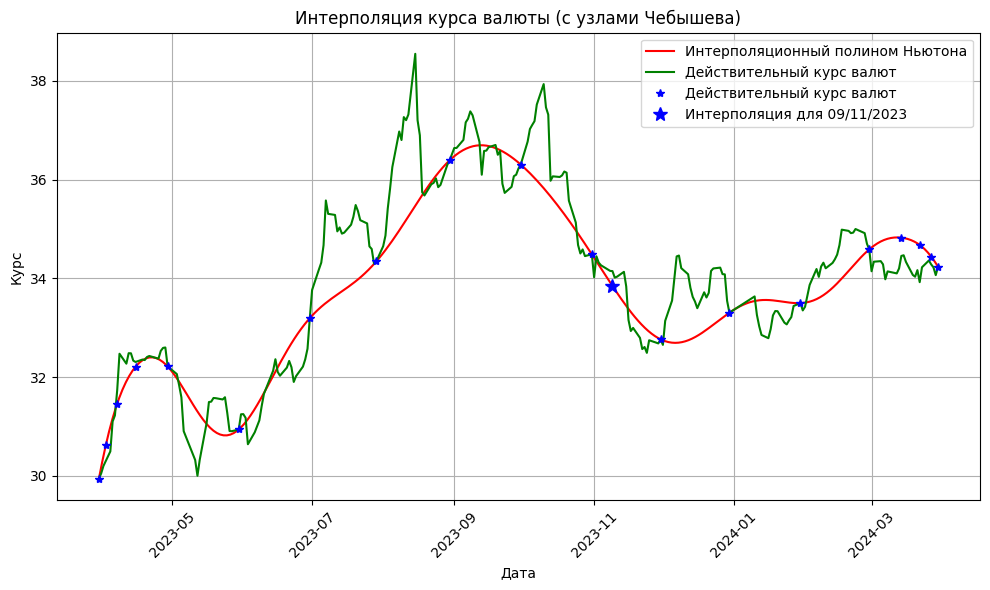

Погрешность:  1.8880779874923947


In [6]:
# Введение узлов чебышева
n_additional_nodes = len(dates_str) * 2
dates_str, rates = add_chebyshev_nodes(dates_str, rates, n_additional_nodes)

# Обработка данных
dates, days_since_start = calculate_days_since_start(dates_str)
coefficients = calculate_divided_differences(days_since_start, rates)

# Оценка погрешности
real_dates_str = [x for x in all_dates_str if x not in dates_str]

# Выбор тестовой даты и интерполяция
test_date_str = "09/11/2023"
test_days_since_start = (datetime.strptime(test_date_str, "%d/%m/%Y") - dates[0]).days
interpolated_rate = newton_interpolation(test_days_since_start, days_since_start,
coefficients)

# Подготовка данных для графика
interpolation_days = np.linspace(min(days_since_start), max(days_since_start), 250)
interpolated_rates = [newton_interpolation(day, days_since_start, coefficients) for day in interpolation_days]
interpolated_dates = [dates[0] + timedelta(days=day) for day in interpolation_days]

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(interpolated_dates, interpolated_rates, 'r-', label='Интерполяционный полином Ньютона')
plt.plot(all_dates, real_rates, 'g-', label='Действительный курс валют')
plt.plot(dates, rates, 'b*', label='Действительный курс валют')
plt.plot(datetime.strptime(test_date_str, "%d/%m/%Y"), interpolated_rate, 'b*',
markersize=10, label=f'Интерполяция для {test_date_str}')
plt.xlabel('Дата')
plt.ylabel('Курс')
plt.title('Интерполяция курса валюты (с узлами Чебышева)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show(), interpolated_rate

print("Погрешность: ", calc_error(real_dates_str, real_rates, all_dates_str, interpolated_rates))

**Задание 3** \\
Построить интерполяционный полином Лагранжа для своего индивидуального задания (подготовить код программы на языке Python). Предусмотреть оценку погрешности. Выполнить расчет интерполяционного значения для даты своего рождения. Оценить ошибку интерполяции. Используйте узлы Чебышёва или другие оптимизированные распределения узлов, чтобы минимизировать ошибку интерполяции. Все необходимые числовые результаты и графики отразить в отчете. Сопоставить с результатами, полученными в предыдущем пункте.

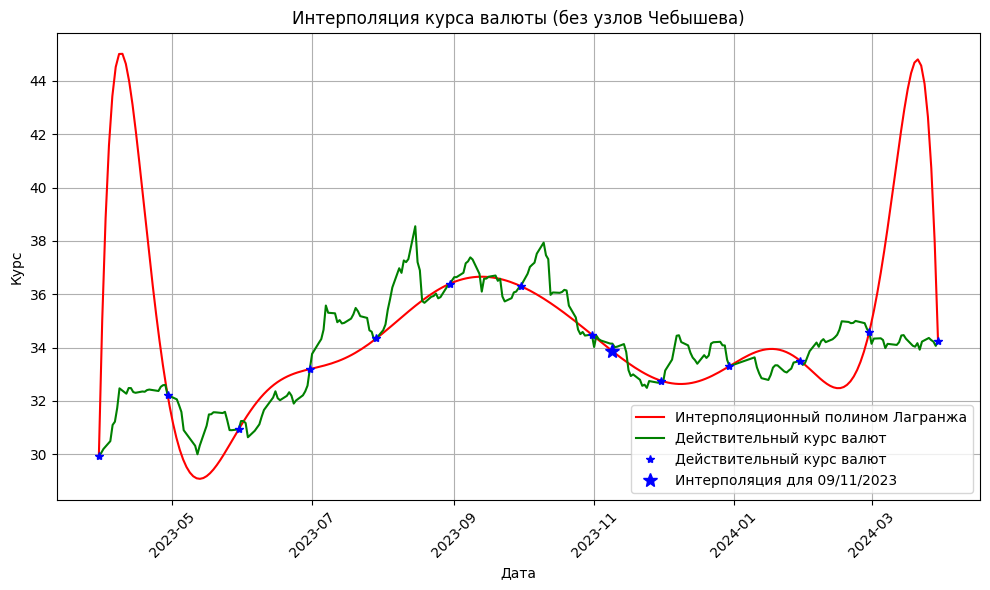

Погрешность:  2.6684049670607117


In [27]:
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

def get_lagrange_poly(x_array, y_array):
  return Polynomial(lagrange(x_array, y_array).coef[::-1])

def get_lagrange_interpolation(poly, x):
  return poly(x)

dates_str = ["30/03/2023", "29/04/2023", "30/05/2023", "30/06/2023", "29/07/2023",
             "30/08/2023", "30/09/2023", "31/10/2023", "30/11/2023", "30/12/2023",
             "30/01/2024", "29/02/2024", "30/03/2024"]
rates = [	29.9386, 32.2153, 30.9381, 	33.1938, 34.3431, 36.3919, 	36.3054, 	34.4874,
         32.7647, 33.3042, 	33.4987, 	34.5867, 34.2375 ]

# Обработка данных
dates, days_since_start = calculate_days_since_start(dates_str)
poly = get_lagrange_poly(days_since_start, rates)

# Оценка погрешности
real_dates_str = [x for x in all_dates_str if x not in dates_str]

# Выбор тестовой даты и интерполяция
test_date_str = "09/11/2023"
test_days_since_start = (datetime.strptime(test_date_str, "%d/%m/%Y") - dates[0]).days
interpolated_rate = get_lagrange_interpolation(poly, test_days_since_start)

# Подготовка данных для графика
interpolation_days = np.linspace(min(days_since_start), max(days_since_start), 250)
interpolated_rates = [get_lagrange_interpolation(poly, day) for day in interpolation_days]
interpolated_dates = [dates[0] + timedelta(days=day) for day in interpolation_days]

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(interpolated_dates, interpolated_rates, 'r-', label='Интерполяционный полином Лагранжа')
plt.plot(all_dates, real_rates, 'g-', label='Действительный курс валют')
plt.plot(dates, rates, 'b*', label='Действительный курс валют')
plt.plot(datetime.strptime(test_date_str, "%d/%m/%Y"), interpolated_rate, 'b*',
markersize=10, label=f'Интерполяция для {test_date_str}')
plt.xlabel('Дата')
plt.ylabel('Курс')
plt.title('Интерполяция курса валюты (без узлов Чебышева)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show(), interpolated_rate

print("Погрешность: ", calc_error(real_dates_str, real_rates, all_dates_str, interpolated_rates))

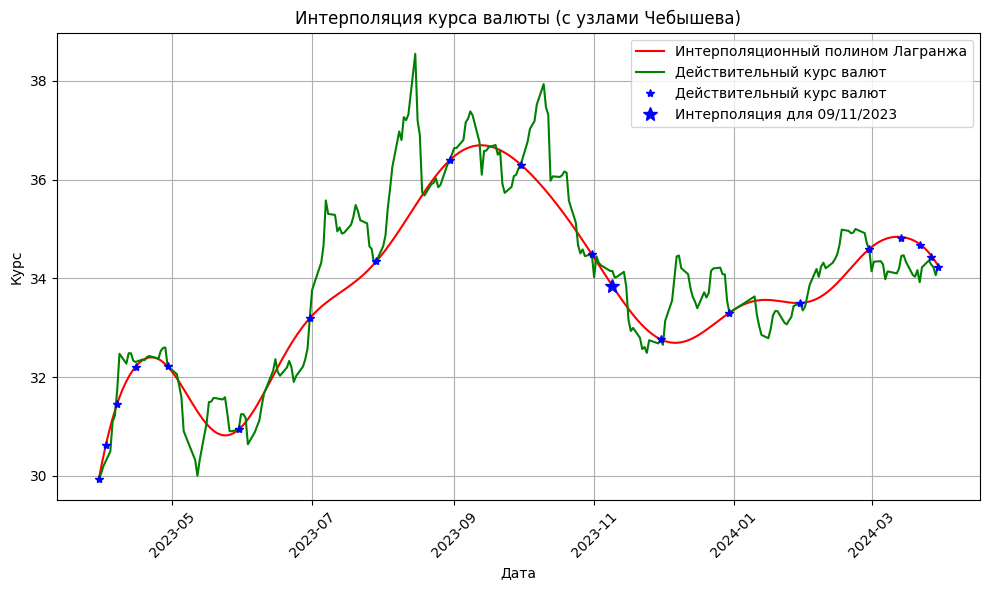

Погрешность:  1.8894626384859299


In [28]:
# Введение узлов чебышева
n_additional_nodes = len(dates_str) * 2
dates_str, rates = add_chebyshev_nodes(dates_str, rates, n_additional_nodes)

# Обработка данных
dates, days_since_start = calculate_days_since_start(dates_str)
poly = get_lagrange_poly(days_since_start, rates)

# Оценка погрешности
real_dates_str = [x for x in all_dates_str if x not in dates_str]

# Выбор тестовой даты и интерполяция
test_date_str = "09/11/2023"
test_days_since_start = (datetime.strptime(test_date_str, "%d/%m/%Y") - dates[0]).days
interpolated_rate = get_lagrange_interpolation(poly, test_days_since_start)

# Подготовка данных для графика
interpolation_days = np.linspace(min(days_since_start), max(days_since_start), 250)
interpolated_rates = [get_lagrange_interpolation(poly, day) for day in interpolation_days]
interpolated_dates = [dates[0] + timedelta(days=day) for day in interpolation_days]

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(interpolated_dates, interpolated_rates, 'r-', label='Интерполяционный полином Лагранжа')
plt.plot(all_dates, real_rates, 'g-', label='Действительный курс валют')
plt.plot(dates, rates, 'b*', label='Действительный курс валют')
plt.plot(datetime.strptime(test_date_str, "%d/%m/%Y"), interpolated_rate, 'b*',
markersize=10, label=f'Интерполяция для {test_date_str}')
plt.xlabel('Дата')
plt.ylabel('Курс')
plt.title('Интерполяция курса валюты (с узлами Чебышева)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show(), interpolated_rate

print("Погрешность: ", calc_error(real_dates_str, real_rates, all_dates_str, interpolated_rates))

**Задание 4** \\
Выполнить экстраполяцию табличной функции для текущей даты. Оценить ошибку экстраполяции.

In [33]:
# Выбор тестовой даты и интерполяция
test_date_str = "09/11/2023"
test_days_since_start = (datetime.strptime(test_date_str, "%d/%m/%Y") - dates[0]).days
interpolated_rate = get_lagrange_interpolation(poly, test_days_since_start)

actual = 34.2

print("Предсказанный курс:", interpolated_rate)
print("Текущий курс:", actual)
print("Ошибка:", abs(interpolated_rate - actual))

Предсказанный курс: 33.84458899302389
Текущий курс: 34.2
Ошибка: 0.3554110069761123


**Вывод:** в ходе лабораторной работы изучили методы интерполяции и экстраполяции функций, особенности их алгоритмизации.